# Audio Feature Extraction
Program for extracting audio characteristics of sounds from screwdrivers of different brands in this case Bosch and Black and Decker

## Libraries

In [1]:
import librosa #Library for audio features extraction
import librosa.display
import math
import os #Library for directories arrangement
import numpy as np #It helps us to get a better array format
import matplotlib.pyplot as plt #Helping library for feature graphs
import pyaudio #Helping library for getting audio and giving him format
import wave  #Allows us to read and write Wav files
import winsound #It allows access to the basic sound reproduction machinery provided by the Windows platform.
import scipy.io.wavfile as waves #Important library for the audio data
import scipy.fftpack as fourier # library to pass to the frequency domain in a simple way
import IPython.display as ipd # Library for listening to the audios

## Audio Path

In [2]:
clipbosch = (r'Audios\BoschAudio.wav')
clipblackdecker = (r'Audios\BlackDeckerAudio.wav')

## Terms to know for Audio in Digital Form:

### Frequency (Hz)
-Frequency describes the differences of wave lengths.

-We interperate frequency has high and low pitches.
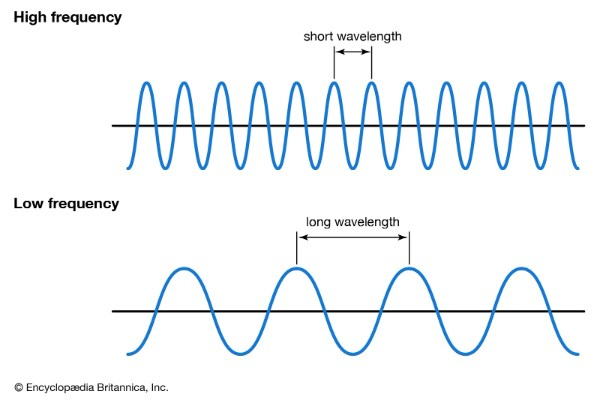

### Intensity (db/Power)
 -Intensity describes the amplitude (height) of the wave.
 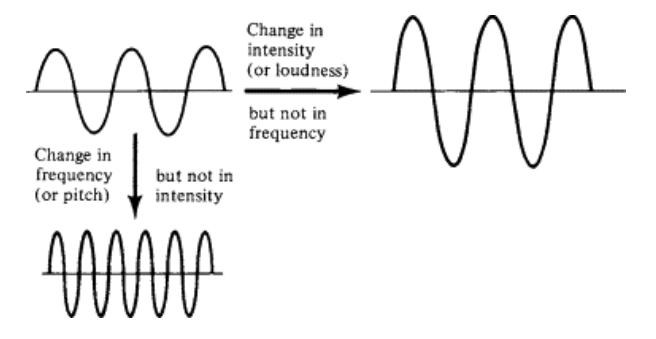

### Sample rate

-Sample rate is specific to how the computer reads in the audio file.

-Think of it as the "resolution" of the audio.


### Fourier Transform
The Fourier transform is a mathematical technique used to analyze signals and functions by converting them from the time domain to the frequency domain. It reveals the frequency components present in a signal, showing the amplitude and phase of each frequency component. By representing signals in terms of frequencies, it enables the identification of patterns, periodicities, and specific features that might not be apparent in the time domain. 

#### Fourier Transform applications

-Signal processing

-Communication

-Image analysis

-Quantum mechanics

### Window function
In signal processing and statistics, a window function (also known as an apodization function or tapering function) is a mathematical function that is zero-valued outside of some chosen interval, normally symmetric around the middle of the interval, usually near a maximum in the middle, and usually tapering away from the middle.


### Spectral Leakage 
The Fourier transform of a function of time, s(t), is a complex-valued function of frequency, S(f), often referred to as a frequency spectrum. Any linear time-invariant operation on s(t) produces a new spectrum of the form H(f)•S(f), which changes the relative magnitudes and/or angles (phase) of the non-zero values of S(f). Any other type of operation creates new frequency components that may be referred to as spectral leakage in the broadest sense. Sampling, for instance, produces leakage, which we call aliases of the original spectral component. For Fourier transform purposes, sampling is modeled as a product between s(t) and a Dirac comb function. The spectrum of a product is the convolution between S(f) and another function, which inevitably creates the new frequency components. But the term 'leakage' usually refers to the effect of windowing, which is the product of s(t) with a different kind of function, the window function. Window functions happen to have finite duration, but that is not necessary to create leakage. Multiplication by a time-variant function is sufficient.

### Aliasing
In signal processing and related disciplines, aliasing is the overlapping of frequency components resulting from a sample rate below the Nyquist frequency. This overlap results in distortion or artifacts when the signal is reconstructed from samples which causes the reconstructed signal to differ from the original continuous signal. Aliasing that occurs in signals sampled in time, for instance in digital audio or the stroboscopic effect, is referred to as temporal aliasing. Aliasing in spatially sampled signals is referred to as spatial aliasing.
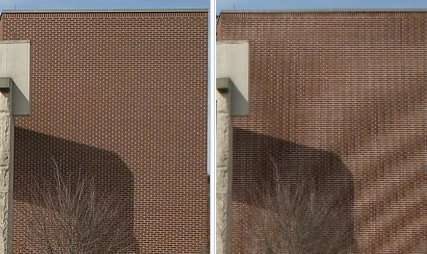

### Windowing
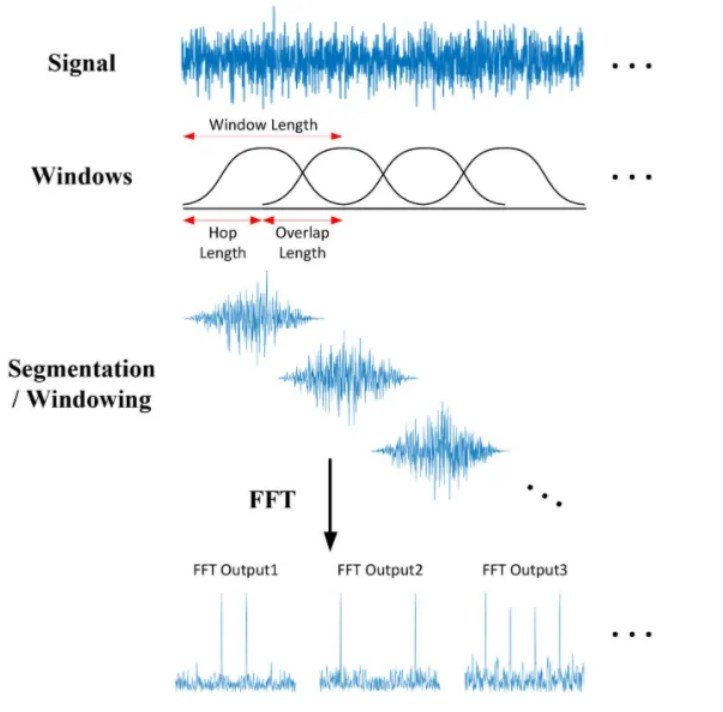
-Window length is the length of the fixed intervals in which STFT divides the signal.

-Hop length is the length of the non-intersecting portion of window length.

-Overlap length is the length of the intersecting portion of the window length.

## Loading Audio with Librosa


In [3]:
def LoadAudio_Turn2Decibels(clip):
    y, sr = librosa.load(clip, sr= 44100) 
    D = librosa.stft(y) 
    # STFT of y 
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 
    return y,S_db,sr

## Audio playback

In [4]:
ipd.Audio(clipbosch)

In [5]:
ipd.Audio(clipblackdecker)

## Extraction of Audio Features

In [6]:
y1,S_db1,sr1=LoadAudio_Turn2Decibels(clipbosch)
y2,S_db2,sr2=LoadAudio_Turn2Decibels(clipblackdecker)


### Waveform
A waveform is a graphical representation of a signal's amplitude variation over time. It displays the changes in the signal's magnitude (vertical axis) as it progresses through time (horizontal axis). Waveforms are commonly used to visualize audio, electrical, and other types of signals.

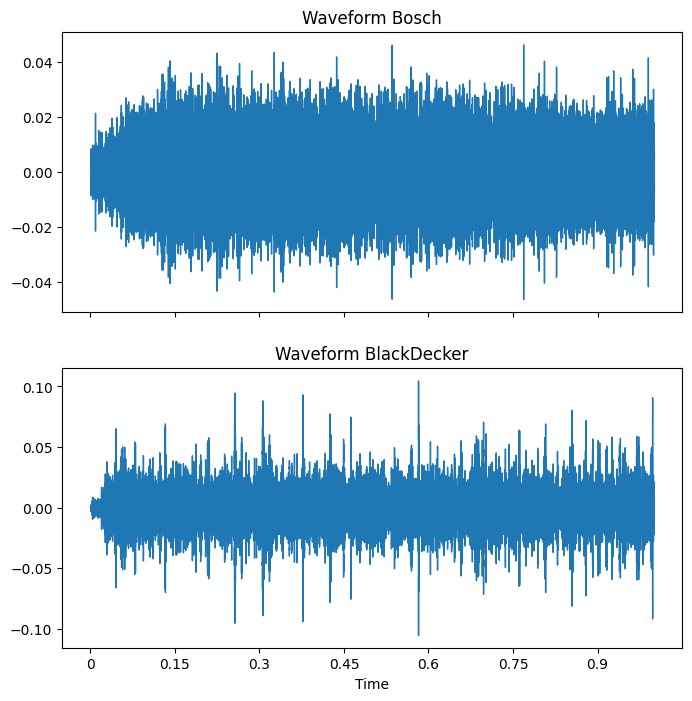

In [7]:
# Simple WAVEFORM to check clip trimming accuracy 
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
img1 = librosa.display.waveshow(y1, sr=sr1,ax=ax[0]) 
ax[0].set(title='Waveform Bosch')
ax[0].label_outer()
img2 = librosa.display.waveshow(y2, sr=sr2,ax=ax[1]) 
ax[1].set(title='Waveform BlackDecker')
ax[1].label_outer() 

### Root Mean Square Energy

-RMS of all samples in a frame

-Indicator of loudness

-Less sensitive to outliers than Amplitude Envelope

#### Root mean square applications

-Audio segmentation, Music genre classification

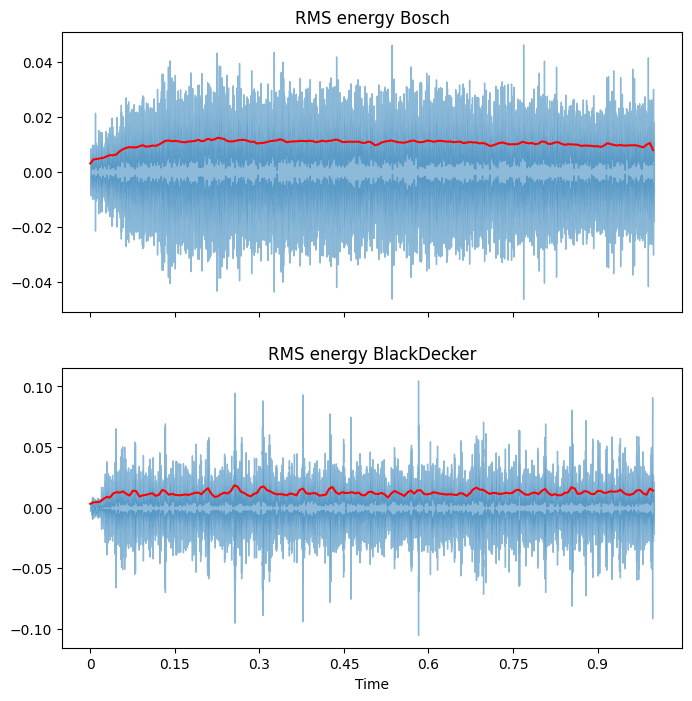

In [8]:
FRAME_SIZE = 512 #1024
HOP_LENGTH = 256

rms_y1 = librosa.feature.rms(y=y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_y2 = librosa.feature.rms(y=y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

frames1 = range(len(rms_y1))
frames2 = range(len(rms_y2))
t1 = librosa.frames_to_time(frames1,sr=sr1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2,sr=sr1, hop_length=HOP_LENGTH)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
img1 = librosa.display.waveshow(y1,sr=sr1,alpha=0.5,ax=ax[0]) 
ax[0].plot(t1, rms_y1, color="r")
ax[0].set(title='RMS energy Bosch')
ax[0].label_outer()
img2 = librosa.display.waveshow(y2,sr=sr1, alpha=0.5,ax=ax[1]) 
ax[1].plot(t2, rms_y2, color="r")
ax[1].set(title='RMS energy BlackDecker')
ax[1].label_outer() 

### Zero Crossing Rate

-Number of times a signal crosses the horizontal axis

#### Zero Crossing rate applications

-Recognition of percussive vs pitched sounds, Monophonic speech estimation, Voice/unvoiced desicion for speech signals

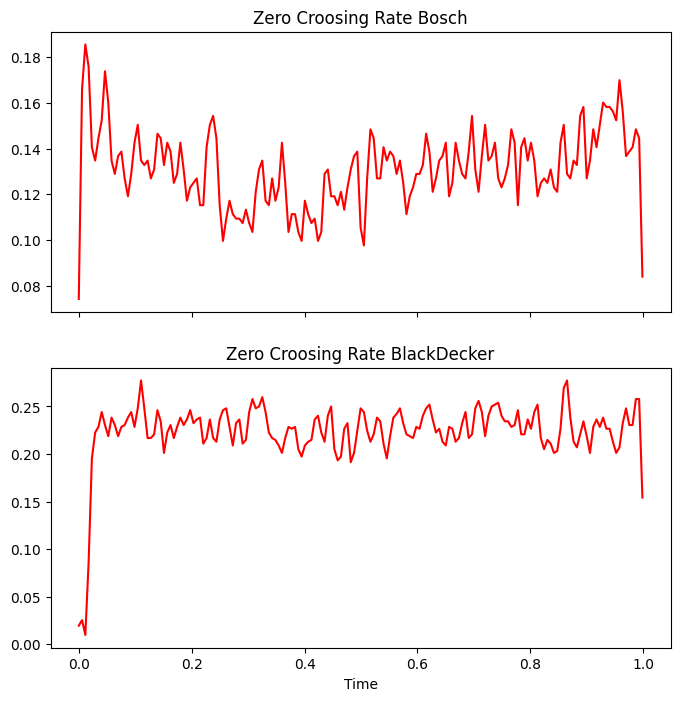

In [9]:
zcr_y1 = librosa.feature.zero_crossing_rate(y1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_y2 = librosa.feature.zero_crossing_rate(y2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
ax[0].plot(t1, zcr_y1, color="r")
ax[0].set_xlabel("Time")
ax[0].set(title='Zero Croosing Rate Bosch')
ax[0].label_outer()
ax[1].plot(t2, zcr_y2, color="r")
ax[1].set_xlabel("Time")
ax[1].set(title='Zero Croosing Rate BlackDecker')
ax[1].label_outer() 

### Fourier Transform
The Fourier transform is a mathematical technique used to analyze signals and functions by converting them from the time domain to the frequency domain. It reveals the frequency components present in a signal, showing the amplitude and phase of each frequency component. By representing signals in terms of frequencies, it enables the identification of patterns, periodicities, and specific features that might not be apparent in the time domain. 

#### Fourier Transform applications

-Signal processing

-Communication

-Image analysis

-Quantum mechanics

### Short time Fourier Transform (STFT)
The short-time Fourier transform (STFT) is used to analyze how the frequency content of a nonstationary signal changes over time

### Frequency vs Amplitude Graph

-Frequency view of a signal

-It allows you see the different frequency components

-It gives an idea of the the different frequency components amplitude

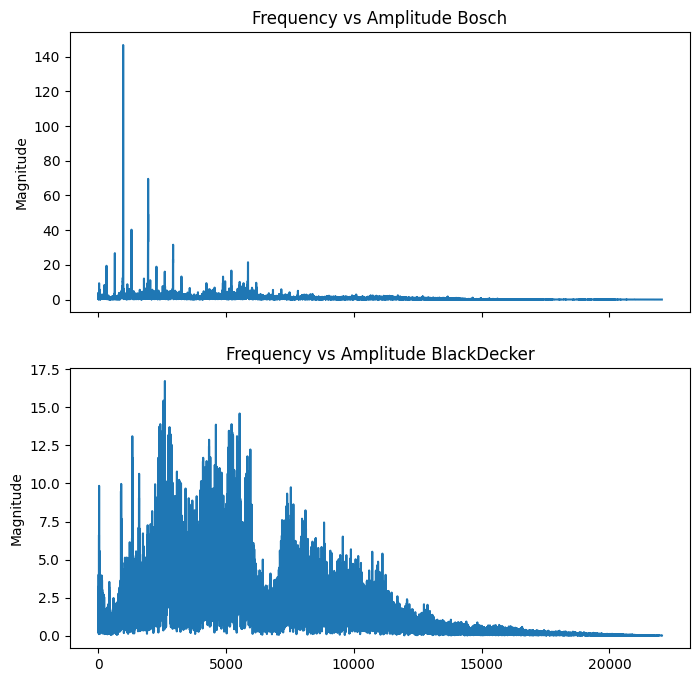

In [10]:
fft1=np.fft.fft(y1)
fft2=np.fft.fft(y2)

magnitude1=np.abs(fft1)
magnitude2=np.abs(fft2)
frequency1=np.linspace(0,sr1,len(magnitude1))
frequency2=np.linspace(0,sr2,len(magnitude2))

left_frequency1=frequency1[:int(len(frequency1)/2)]
left_magnitude1=magnitude1[:int(len(frequency1)/2)]

left_frequency2=frequency2[:int(len(frequency2)/2)]
left_magnitude2=magnitude2[:int(len(frequency2)/2)]

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
ax[0].plot(left_frequency1,left_magnitude1)
ax[0].set_xlabel("Frequency")
ax[0].set_ylabel("Magnitude")
ax[0].set(title='Frequency vs Amplitude Bosch')
ax[0].label_outer()

ax[1].plot(left_frequency2,left_magnitude2)
ax[1].set_ylabel("Magnitude")
ax[1].set(title='Frequency vs Amplitude BlackDecker')
ax[1].label_outer()

### Spectrogram
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.
Spectrograms are basically two-dimensional graphs, with a third dimension represented by colors. Time runs from left (oldest) to right (youngest) along the horizontal axis. The vertical axis represents frequency, which can also be thought of as pitch or tone, with the lowest frequencies at the bottom and the highest frequencies at the top.  The amplitude (or energy or “loudness”) of a particular frequency at a particular time is represented by the third dimension, color, with dark blues corresponding to low amplitudes and brighter colors up through red corresponding to progressively stronger (or louder) amplitudes.

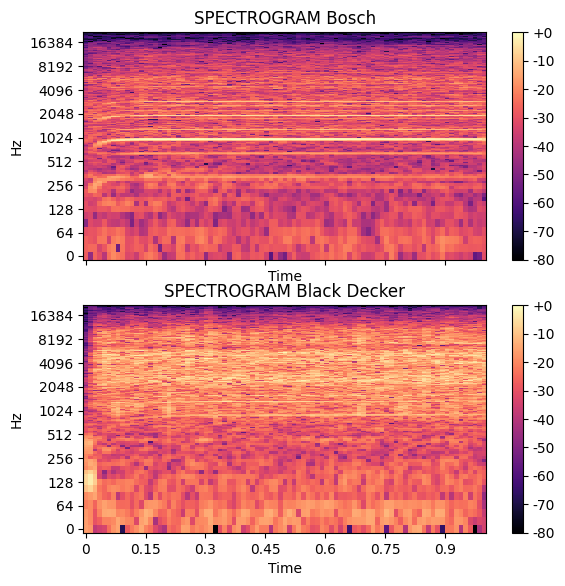

In [11]:
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))

img1= librosa.display.specshow(S_db1,x_axis='time',sr=sr1, y_axis='log',ax=ax[0]) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='SPECTROGRAM Bosch')
ax[0].label_outer()
 
img2 = librosa.display.specshow(S_db2, x_axis='time',sr=sr2, y_axis='log',ax=ax[1]) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='SPECTROGRAM Black Decker')
ax[1].label_outer()

### Grey Spectrogram

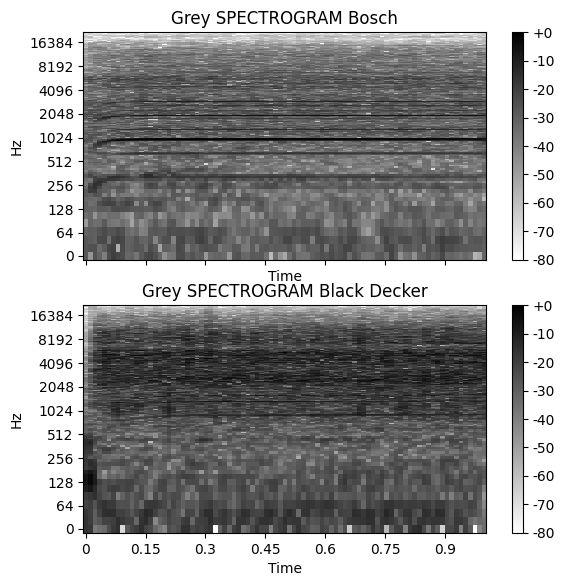

In [12]:
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))

#img1 = librosa.display.specshow(S_db1, x_axis='time', y_axis='linear') 
img1= librosa.display.specshow(S_db1,x_axis='time', y_axis='log',ax=ax[0], cmap='gray_r',sr=sr1) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='Grey SPECTROGRAM Bosch')
ax[0].label_outer()
#img2 = librosa.display.specshow(S_db2, y_axis='linear') 

img2 = librosa.display.specshow(S_db2, x_axis='time', y_axis='log',ax=ax[1], cmap='gray_r',sr=sr2) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='Grey SPECTROGRAM Black Decker')
ax[1].label_outer()

### Mel Spectrogram
Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.

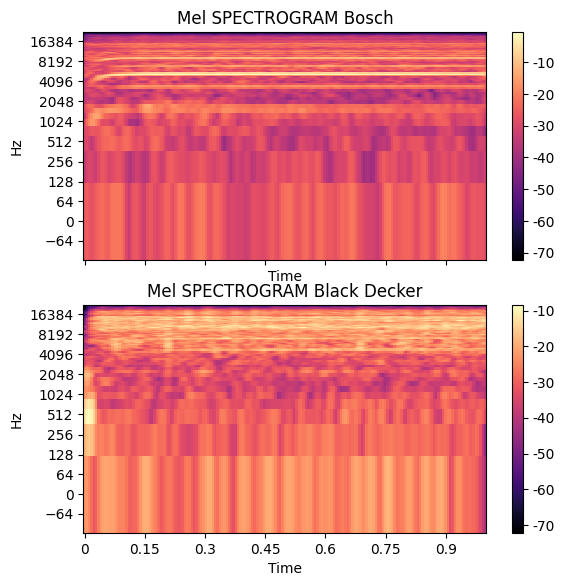

In [13]:
mel_spectrogram1 = librosa.feature.melspectrogram(y=y1, sr=sr1, n_fft=2048, hop_length=HOP_LENGTH, n_mels=90)
log_mel_spectrogram1 = librosa.power_to_db(mel_spectrogram1)
mel_spectrogram2 = librosa.feature.melspectrogram(y=y2, sr=sr2, n_fft=2048, hop_length=HOP_LENGTH, n_mels=90) 
log_mel_spectrogram2 = librosa.power_to_db(mel_spectrogram2)

fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))

img1= librosa.display.specshow(log_mel_spectrogram1,x_axis='time', y_axis='log',ax=ax[0],sr=sr1,hop_length=256) #,hop_length=256
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='Mel SPECTROGRAM Bosch')
ax[0].label_outer()

img2 = librosa.display.specshow(log_mel_spectrogram2, x_axis='time', y_axis='log',ax=ax[1],sr=sr2,hop_length=256) #,hop_length=256
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='Mel SPECTROGRAM Black Decker')
ax[1].label_outer()

### Chromagram
Chromagram is defined as the whole spectral audio information mapped into one octave. Each octave is divided into 12 bins representing each one semitone. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

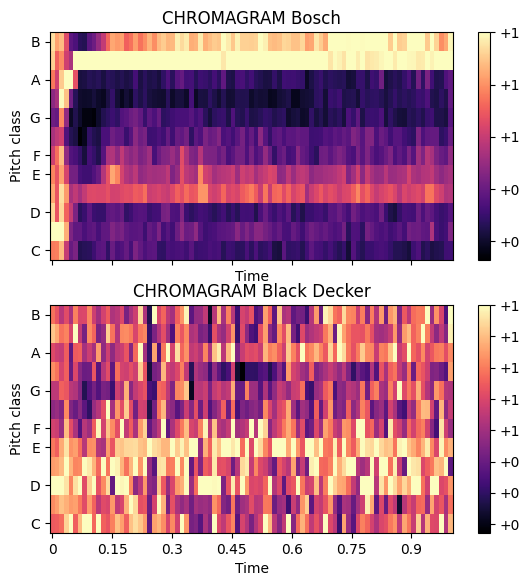

In [14]:
CHROMAGRAM1 = librosa.feature.chroma_cqt(y=y1, sr=sr1,fmin=70) #Minimum frequency to analyze in the CQT. 70Hz
CHROMAGRAM2 = librosa.feature.chroma_cqt(y=y2, sr=sr2,fmin=70) #If fmin is changed, it might give you a warning.
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))

img1= librosa.display.specshow(CHROMAGRAM1,x_axis='time', y_axis='chroma',ax=ax[0],sr=sr1) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='CHROMAGRAM Bosch')
ax[0].label_outer()

img2 = librosa.display.specshow(CHROMAGRAM2,x_axis='time', y_axis='chroma',ax=ax[1],sr=sr2) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='CHROMAGRAM Black Decker')
ax[1].label_outer()

### MFCC (Mel-frequency cepstral coefficients)
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

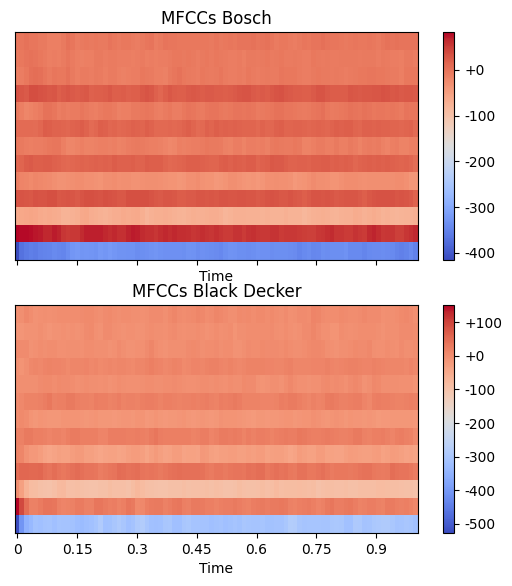

In [15]:
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13, n_fft=2048) #n_fft=2048
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13, n_fft=2048) #n_fft=2048
fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))

img1= librosa.display.specshow(mfccs1,x_axis='time',ax=ax[0],sr=sr1) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='MFCCs Bosch')
ax[0].label_outer()

img2 = librosa.display.specshow(mfccs2,x_axis='time', ax=ax[1],sr=sr2) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='MFCCs Black Decker')
ax[1].label_outer()

### Delta MFCCs
The idea behind using delta (differential) and delta-delta (acceleration) coefficients is that in order to recognize speech better, we need to understand the dynamics of the power spectrum, i.e., the trajectories of MFCCs over time.

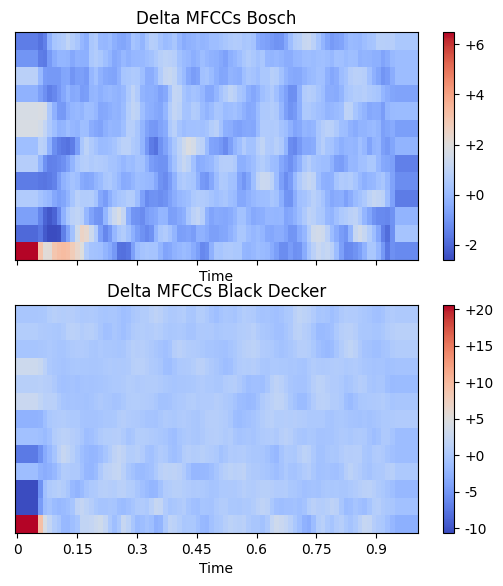

In [16]:
delta_mfccs1 = librosa.feature.delta(mfccs1)
delta_mfccs2 = librosa.feature.delta(mfccs2)

fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))
img1= librosa.display.specshow(delta_mfccs1,x_axis='time',ax=ax[0],sr=sr1) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='Delta MFCCs Bosch')
ax[0].label_outer()

img2 = librosa.display.specshow(delta_mfccs2,x_axis='time', ax=ax[1],sr=sr1) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='Delta MFCCs Black Decker')
ax[1].label_outer()

### Delta2 MFCCs

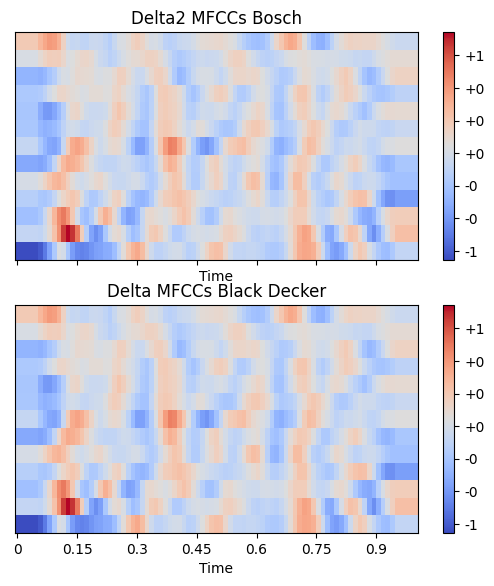

In [17]:
delta2_mfccs1 = librosa.feature.delta(delta_mfccs1)
delta2_mfccs2 = librosa.feature.delta(delta_mfccs1)

fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))
img1= librosa.display.specshow(delta2_mfccs1,x_axis='time',ax=ax[0],sr=sr1) 
fig.colorbar(mappable=img1,format="%+2.f", ax=ax[0])
ax[0].set(title='Delta2 MFCCs Bosch')
ax[0].label_outer()

img2 = librosa.display.specshow(delta2_mfccs2,x_axis='time', ax=ax[1],sr=sr2) 
fig.colorbar(mappable=img2,format="%+2.f", ax=ax[1])
ax[1].set(title='Delta MFCCs Black Decker')
ax[1].label_outer()

### Spectral Centroid
The spectral centroid is a measure used in digital signal processing to characterise a spectrum. It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound. It is sometimes called center of spectral mass.

-Centre of gravity of magnitude spectrum

-Frequency band where most of the energy is concentrated

-Measure of "brightness" of sound

#### Spectral centroid applications

-Audio classification

-Music classification

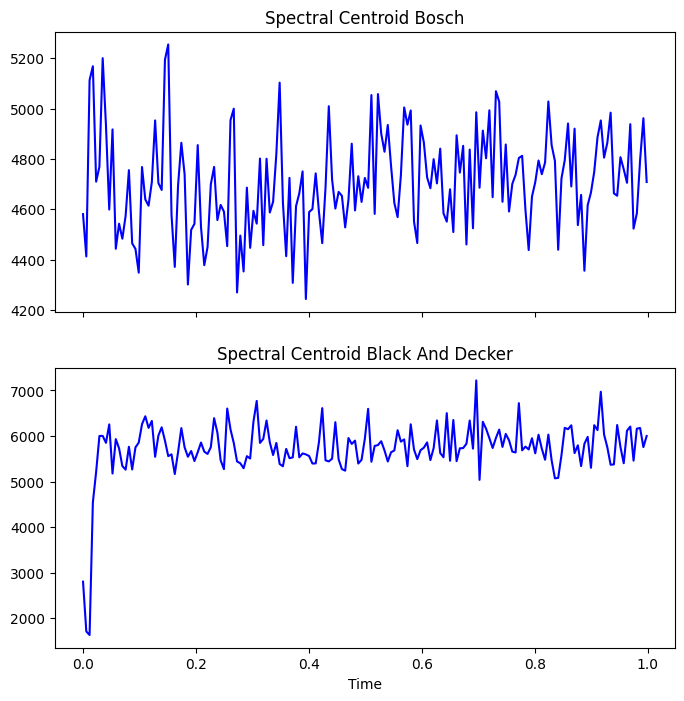

In [18]:
sc_y1 = librosa.feature.spectral_centroid(y=y1, sr=sr1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0] # n_fft=64
sc_y2 = librosa.feature.spectral_centroid(y=y2, sr=sr2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0] # n_fft=64

fig, ax = plt.subplots(nrows=2, figsize=(8, 8))
ax[0].plot(t1,sc_y1, color="b")
ax[0].set_xlabel("Time")
ax[0].set(title='Spectral Centroid Bosch')
ax[0].label_outer()

ax[1].plot(t2,sc_y2, color="b")
ax[1].set_xlabel("Time")
ax[1].set(title='Spectral Centroid Black And Decker')
ax[1].label_outer()

### Bandwidth
Bandwidth is the difference between the upper and lower frequencies in a continuous band of frequencies

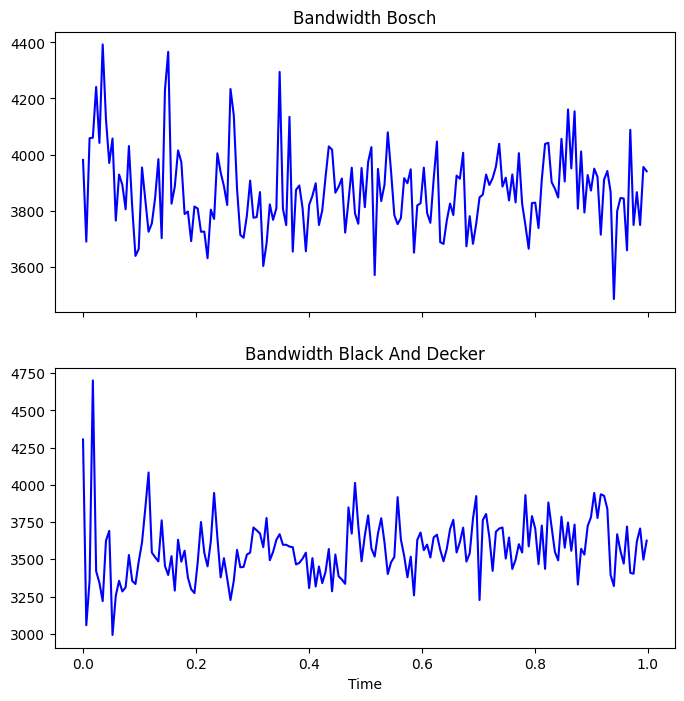

In [19]:
ban_y1 = librosa.feature.spectral_bandwidth(y=y1, sr=sr1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0] #n_fft=512
ban_y2 = librosa.feature.spectral_bandwidth(y=y2, sr=sr2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0] #n_fft=512

fig, ax = plt.subplots(nrows=2, figsize=(8, 8))
ax[0].plot(t1,ban_y1, color="b")
ax[0].set_xlabel("Time")
ax[0].set(title='Bandwidth Bosch')
ax[0].label_outer()

ax[1].plot(t2,ban_y2, color="b")
ax[1].set_xlabel("Time")
ax[1].set(title='Bandwidth Black And Decker')
ax[1].label_outer()

### Spectral Contrast 
Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband. Spectral contrast is defined as the decibel difference between peaks and valleys in the spectrum.

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

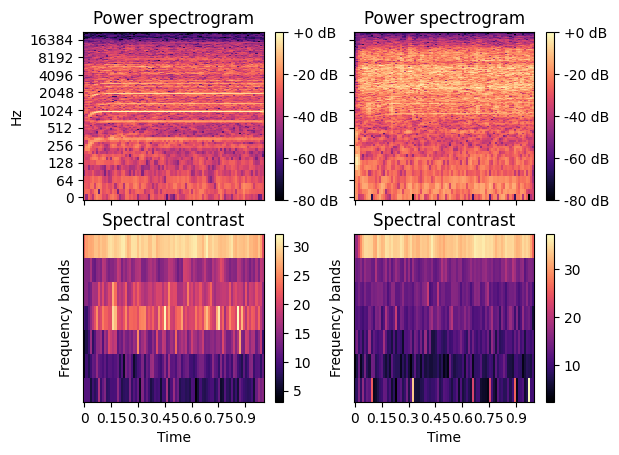

In [20]:
S1 = np.abs(librosa.stft(y1))
contrast1 = librosa.feature.spectral_contrast(S=S1, sr=sr1)

S2 = np.abs(librosa.stft(y2))
contrast2 = librosa.feature.spectral_contrast(S=S2, sr=sr2)

fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S1,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0,0],sr=sr1) #hop_length=256
fig.colorbar(img1, ax=[ax[0,0]], format='%+2.0f dB')
ax[0,0].set(title='Power spectrogram')
ax[0,0].label_outer()
img2 = librosa.display.specshow(contrast1, x_axis='time', ax=ax[1,0],sr=sr1)
fig.colorbar(img2, ax=[ax[1,0]])
ax[1,0].set(ylabel='Frequency bands', title='Spectral contrast')

img3 = librosa.display.specshow(librosa.amplitude_to_db(S2,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0,1],sr=sr2)
fig.colorbar(img3, ax=[ax[0,1]], format='%+2.0f dB')
ax[0,1].set(title='Power spectrogram')
ax[0,1].label_outer()
img4 = librosa.display.specshow(contrast2, x_axis='time', ax=ax[1,1],sr=sr2)
fig.colorbar(img4, ax=[ax[1,1]])
ax[1,1].set(ylabel='Frequency bands', title='Spectral contrast')

### Spectral Roll Off
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies.

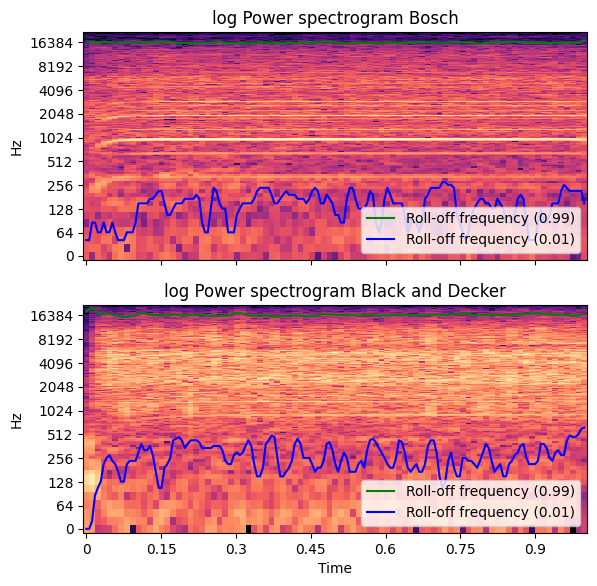

In [21]:
# Approximate maximum frequencies with roll_percent=0.85 (default)
librosa.feature.spectral_rolloff(y=y1, sr=sr1)

# Approximate maximum frequencies with roll_percent=0.99
rolloff1 = librosa.feature.spectral_rolloff(y=y1, sr=sr1, roll_percent=0.99,hop_length=HOP_LENGTH)
rolloff2 = librosa.feature.spectral_rolloff(y=y2, sr=sr2, roll_percent=0.99,hop_length=HOP_LENGTH)

# Approximate minimum frequencies with roll_percent=0.01
rolloff_min1 = librosa.feature.spectral_rolloff(y=y1, sr=sr1, roll_percent=0.01,hop_length=HOP_LENGTH)
rolloff_min2 = librosa.feature.spectral_rolloff(y=y2, sr=sr2, roll_percent=0.01,hop_length=HOP_LENGTH)

fig, ax = plt.subplots(nrows=2, sharex=True,figsize=(6.5,6.5))
librosa.display.specshow(S_db1,y_axis='log',x_axis='time',sr=sr1,ax=ax[0]) 
ax[0].plot(librosa.times_like(rolloff1,sr=sr1,hop_length=HOP_LENGTH), rolloff1[0],color='g', label='Roll-off frequency (0.99)')
ax[0].plot(librosa.times_like(rolloff1,sr=sr1,hop_length=HOP_LENGTH), rolloff_min1[0], color='b',
        label='Roll-off frequency (0.01)')
ax[0].legend(loc='lower right')
ax[0].set(title='log Power spectrogram Bosch')
ax[0].label_outer()

librosa.display.specshow(S_db2,y_axis='log',x_axis='time',sr=sr2,ax=ax[1]) 
ax[1].plot(librosa.times_like(rolloff2,sr=sr2,hop_length=HOP_LENGTH), rolloff2[0],color='g', label='Roll-off frequency (0.99)')
ax[1].plot(librosa.times_like(rolloff2,sr=sr2,hop_length=HOP_LENGTH), rolloff_min2[0], color='b',
        label='Roll-off frequency (0.01)')
ax[1].legend(loc='lower right')
ax[1].set(title='log Power spectrogram Black and Decker')
ax[1].label_outer()

### Poly Features
Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.
In the context of audio processing and analysis, "poly features" likely refers to polynomial features or polynomial representations of audio signals. Polynomial features are derived from polynomial functions, and they are used to capture complex patterns and relationships in the data.

When dealing with audio signals, there are various audio features that can be extracted to represent the characteristics of the signal. These features can be used for tasks such as audio classification, recognition, or music analysis.

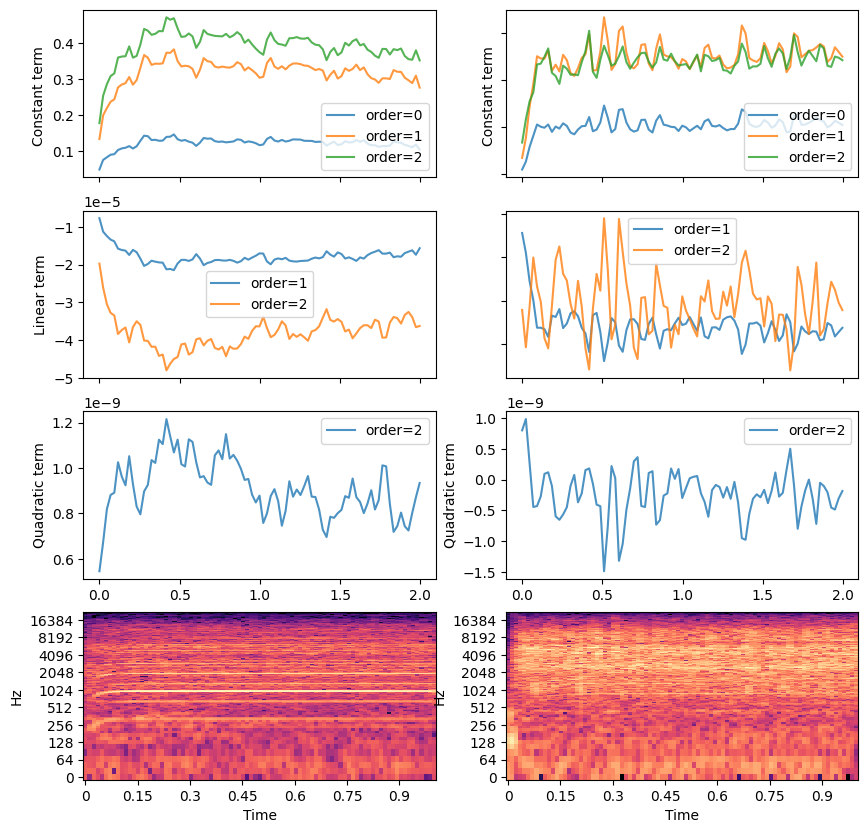

In [22]:
p0 = librosa.feature.poly_features(S=S1,sr=sr1, order=0)
p1 = librosa.feature.poly_features(S=S1,sr=sr1, order=1)
p2 = librosa.feature.poly_features(S=S1,sr=sr1, order=2)
p3 = librosa.feature.poly_features(S=S2,sr=sr2, order=0)
p4 = librosa.feature.poly_features(S=S2,sr=sr2, order=1)
p5 = librosa.feature.poly_features(S=S2,sr=sr2, order=2)

fig, ax = plt.subplots(nrows=4,ncols=2, figsize=(10,10))
times1 = librosa.times_like(p0)
times2 = librosa.times_like(p3)
ax[0,0].plot(times1, p0[0], label='order=0', alpha=0.8)
ax[0,0].plot(times1, p1[1], label='order=1', alpha=0.8)
ax[0,0].plot(times1, p2[2], label='order=2', alpha=0.8)
ax[0,0].legend()
ax[0,0].label_outer()
ax[0,0].set(ylabel='Constant term ')
ax[1,0].plot(times1, p1[0], label='order=1', alpha=0.8)
ax[1,0].plot(times1, p2[1], label='order=2', alpha=0.8)
ax[1,0].set(ylabel='Linear term')
ax[1,0].label_outer()
ax[1,0].legend()
ax[2,0].plot(times1, p2[0], label='order=2', alpha=0.8)
ax[2,0].set(ylabel='Quadratic term')
ax[2,0].legend()
librosa.display.specshow(librosa.amplitude_to_db(S1, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3,0],sr=sr1)
ax[0,1].plot(times2, p3[0], label='order=0', alpha=0.8)
ax[0,1].plot(times2, p4[1], label='order=1', alpha=0.8)
ax[0,1].plot(times2, p5[2], label='order=2', alpha=0.8)
ax[0,1].legend()
ax[0,1].label_outer()
ax[0,1].set(ylabel='Constant term ')
ax[1,1].plot(times2, p4[0], label='order=1', alpha=0.8)
ax[1,1].plot(times2, p5[1], label='order=2', alpha=0.8)
ax[1,1].set(ylabel='Linear term')
ax[1,1].label_outer()
ax[1,1].legend()
ax[2,1].plot(times2, p5[0], label='order=2', alpha=0.8)
ax[2,1].set(ylabel='Quadratic term')
ax[2,1].legend()
librosa.display.specshow(librosa.amplitude_to_db(S2, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[3,1],sr=sr2)

### Tonnetz
This representation uses the method of 1 to project chroma features onto a 6-dimensional basis representing the perfect fifth, minor third, and major third each as two-dimensional coordinates.

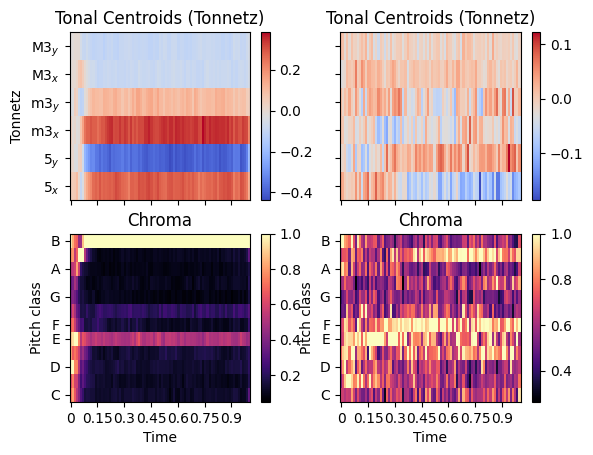

In [23]:
y1 = librosa.effects.harmonic(y1)
tonnetz1 = librosa.feature.tonnetz(y=y1, sr=sr1,fmin=72)#Minimum frequency to analyze in the CQT. 72Hz
y2 = librosa.effects.harmonic(y2)
tonnetz2 = librosa.feature.tonnetz(y=y2, sr=sr2,fmin=72)#If fmin is changed, it might give you a warning.

fig, ax = plt.subplots(nrows=2,ncols=2)
img1 = librosa.display.specshow(tonnetz1,
                                y_axis='tonnetz', x_axis='time', ax=ax[0,0],sr=sr1)
ax[0,0].set(title='Tonal Centroids (Tonnetz)')
ax[0,0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y1, sr=sr1,fmin=72),
                                y_axis='chroma', x_axis='time', ax=ax[1,0],sr=sr1)
ax[1,0].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0,0]])
fig.colorbar(img2, ax=[ax[1,0]])

img3 = librosa.display.specshow(tonnetz2,
                                y_axis='tonnetz', x_axis='time', ax=ax[0,1],sr=sr2)
ax[0,1].set(title='Tonal Centroids (Tonnetz)')
ax[0,1].label_outer()
img4 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y2, sr=sr2,fmin=72),
                                y_axis='chroma', x_axis='time', ax=ax[1,1],sr=sr2)
ax[1,1].set(title='Chroma')
fig.colorbar(img3, ax=[ax[0,1]])
fig.colorbar(img4, ax=[ax[1,1]])

# Other audio features

### Amplitude Envelope

-Max ampllitude value in all samples of a frame

-Gives rough idea of loudness

-Sensitive to outliers

#### Amplitude Envelope applications

-Onset detection and music genre classification



In [24]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

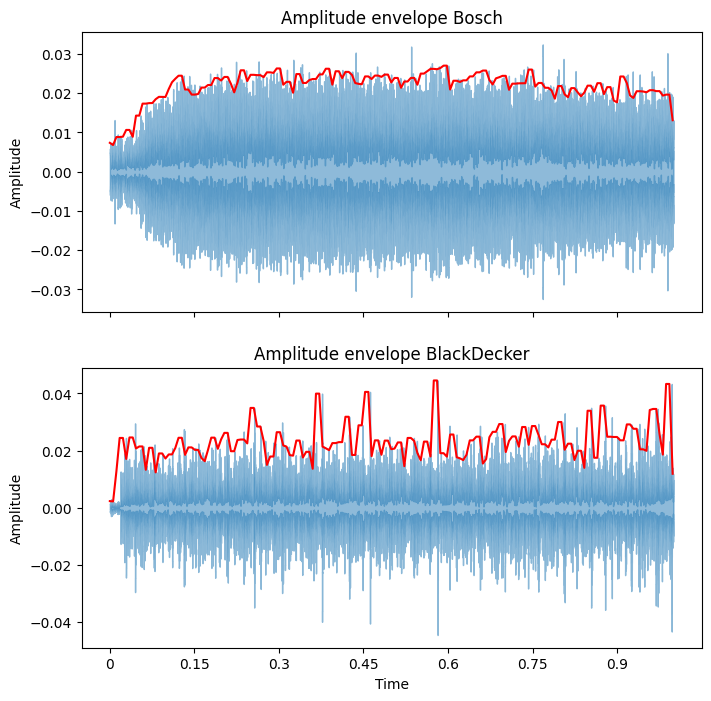

In [25]:
# number of frames in amplitude envelope
ae_y1 = fancy_amplitude_envelope(y1, FRAME_SIZE, HOP_LENGTH)
ae_y2 = fancy_amplitude_envelope(y2, FRAME_SIZE, HOP_LENGTH)

frames1 = range(len(ae_y1))
frames2 = range(len(ae_y2))
t1 = librosa.frames_to_time(frames1,sr=sr1, hop_length=HOP_LENGTH)
t2 = librosa.frames_to_time(frames2,sr=sr1, hop_length=HOP_LENGTH)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
img1 = librosa.display.waveshow(y1,sr=sr1,alpha=0.5,ax=ax[0]) 
ax[0].plot(t1, ae_y1, color="r")
ax[0].set_ylabel("Amplitude")
ax[0].set(title='Amplitude envelope Bosch')
ax[0].label_outer()
img2 = librosa.display.waveshow(y2,sr=sr2, alpha=0.5,ax=ax[1]) 
ax[1].plot(t2, ae_y2, color="r")
ax[1].set_ylabel("Amplitude")
ax[1].set(title='Amplitude envelope BlackDecker')
ax[1].label_outer() 

### Band Energy Ratio
Band ratio measures are a ratio of power between defined frequency bands. We can now define a function we can use to calculate band ratio measures, and apply it to our baseline power spectrum.

-Comparison of energy in the lower/higher frequency bands

-Measure of how dominant low frequencies are
#### Band energy ratio applications 
-Music / Speech discrimination

-Music classification(e.g., Music genre classification)

In [26]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency"""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [27]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency"""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

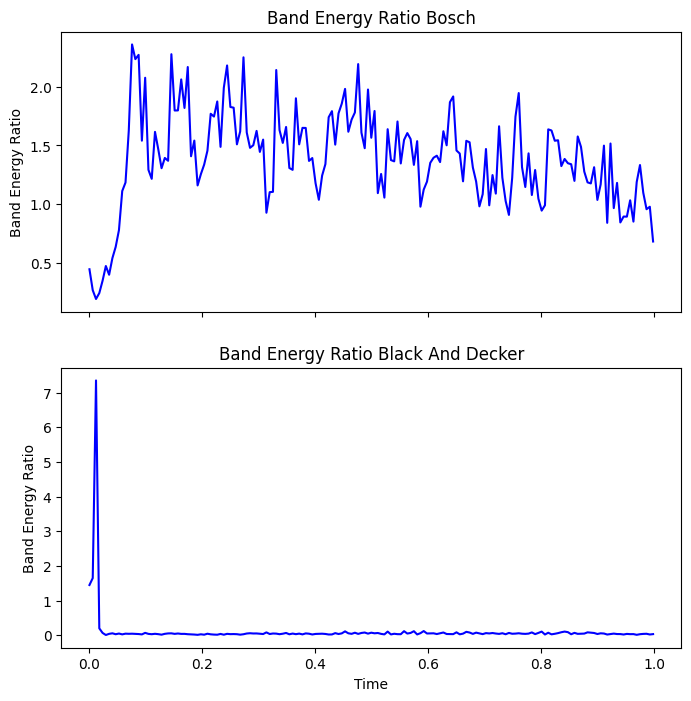

In [28]:
HOP_SIZE=HOP_LENGTH
y_spec1 = librosa.stft(y1, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
y_spec2 = librosa.stft(y2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

split_frequency_bin = calculate_split_frequency_bin(2000, 44100, 1025)
split_frequency_bin

ber_y1 = band_energy_ratio(y_spec1, 2000, sr1)
ber_y2 = band_energy_ratio(y_spec2, 2000, sr2)

frames1 = range(len(ber_y1))
frames2 = range(len(ber_y2))
t1 = librosa.frames_to_time(frames1,sr=sr1, hop_length=HOP_SIZE)
t2 = librosa.frames_to_time(frames2,sr=sr2, hop_length=HOP_SIZE)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 8))
ax[0].plot(t1,ber_y1, color="b")
ax[0].set_ylabel("Band Energy Ratio")
ax[0].set(title='Band Energy Ratio Bosch')
ax[0].label_outer()

ax[1].plot(t2,ber_y2, color="b")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Band Energy Ratio")
ax[1].set(title='Band Energy Ratio Black And Decker')
ax[1].label_outer()

# Notes
-Specify sample rate on each feature because by default almost all features in the book library are set to 22050 Hz